# Predizendo preços de casas em regiões de Boston...

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Carrega o dataset
dataset = load_boston()

In [ ]:
# Tipo de dado
type(dataset)

sklearn.utils.Bunch

In [ ]:
# Descrição do dataset
print(dataset.DESCR)

In [ ]:
# Atribui os dados
X = dataset.data

# Atribui as respostas
y = dataset.target

# Exibe as formas
X.shape, y.shape

((506, 13), (506,))

In [ ]:
# Cria o Data Frame
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df.head(#)

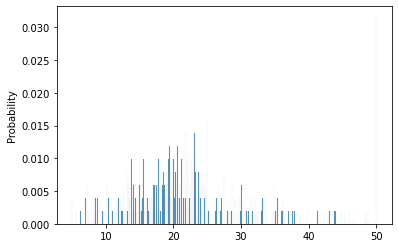

In [ ]:
# Testando os resultados com histograma (usando porcentagens)
sns.histplot(y, stat='probability')

In [ ]:
# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42
)

# Tamanho dividido
len(y_train), len(y_test)

(303, 203)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Construção e treino
knn = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance', # Ponderação
    metric='manhattan' # Métrica
)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [ ]:
# Predições
y_pred = knn.predict(X_test)

In [ ]:
# Quantos por cento dos casos têm menos de 10% de diferença
diff_ratio = np.abs(y_pred - y_test) / y_test
np.mean(diff_ratio <= 0.1) # Maior discrepância, mais acertos

0.5615763546798029

In [ ]:
# Indisponível
mean_absolute_error(y_test, y_pred)

2.5918151331411257

In [13]:
def test(a, b):
    return np.mean((a - b) ** 2)

In [16]:
# Erro quadrático
# np.mean((y_pred - y_test) ** 2) # Menor discrepância
mean_squared_error(np.ones((2, 2)), np.ones((2, 2)) * 6, squared=True), test(np.ones((2, 2)), np.ones((2, 2)) * 6)

(25.0, 25.0)